<a href="https://colab.research.google.com/github/Abonvicine/ESTUDOS---Gerais/blob/main/Teste_extraindo_dados_do_MERGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalando CONDA e IRIS (opcional)

In [ ]:
!python --version # now returns Python 3.6.10 :: Anaconda, Inc.

Python 3.7.10


In [ ]:
%%bash
MINICONDA_INSTALLER_SCRIPT=Miniconda3-4.5.4-Linux-x86_64.sh
MINICONDA_PREFIX=/usr/local
wget https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

Process is interrupted.


In [ ]:
%%bash
conda install --channel defaults conda python=3.6 --yes
conda update --channel defaults --all --yes

bash: line 1: conda: command not found
bash: line 2: conda: command not found


In [ ]:
import sys
sys.path

['',
 '/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython']

In [ ]:
import sys
_ = (sys.path
        .append("/usr/local/lib/python3.6/site-packages"))

# Dependencias iniciais

In [ ]:
!apt-get install -q libgeos-3.5.0
!apt-get install -q libgeos-dev
!pip install -q https://github.com/matplotlib/basemap/archive/master.zip
!pip install -q pyproj==1.9.6
!pip install pygrib
!pip install geojsoncontour
!pip install idx2numpy

Reading package lists...
Building dependency tree...
Reading state information...
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists...
Building dependency tree...
Reading state information...
libgeos-dev is already the newest version (3.6.2-1build2).
libgeos-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.
     \ 148.5MB 87.2MB/s
     |████████████████████████████████| 6.5MB 7.2MB/s 
     |████████████████████████████████| 225kB 26.3MB/s 
     |████████████████████████████████| 2.8MB 7.8MB/s 
     |████████████████████████████████| 15.3MB 332kB/s 
  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-cp37-none-any.whl size=7907 sha256=a2fe488069b4e6600758236b4c5e654ef5857a2e915ceea3d62e03c4139bca30
  Stored in directory: /root/.cache/pip/wheels/7a/c1/da/284ce80a748fab898b8d1fa95468a386e7cf3b81da18511f9d
Successfully bui

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import urllib.request as req
import geojsoncontour
import pygrib
import idx2numpy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import xarray as xr

In [ ]:
if not(os.path.isdir("/content/MERGE")):
    os.mkdir("/content/MERGE")

arquivos = [
            "MERGE_CPTEC_20210224.ctl",
            "MERGE_CPTEC_20210224.grib2",
            "MERGE_CPTEC_20210224.idx"
            ]

for i in arquivos:
    url = f'http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/2021/02/{i}'
    req.urlretrieve(url, f'/content/MERGE/{i}')

gr = pygrib.open(f"/content/MERGE/{arquivos[1]}")  

# Arquivo GRIB2

In [ ]:
dado = gr[1]
temp_vals = dado.values  
x = pd.DataFrame(temp_vals[:])

In [ ]:
grb = gr.select(name='Precipitation')[0]
grb.values

array([[ 0.   ,  0.125,  0.125, ..., 18.   , 18.5  , 15.5  ],
       [ 0.   ,  0.   ,  0.   , ..., 15.875, 15.75 , 15.125],
       [ 0.25 ,  0.   ,  0.   , ..., 13.   , 13.25 , 15.25 ],
       ...,
       [ 0.   ,  0.   ,  0.   , ...,  1.25 ,  1.875,  1.25 ],
       [ 0.   ,  0.   ,  0.   , ...,  1.25 ,  1.625,  1.125],
       [ 0.   ,  0.   ,  0.   , ...,  1.25 ,  1.125,  0.625]])

In [ ]:
lat1 = -40
lat2 =  10
lon1 = 280
lon2 = 350

In [ ]:
data, lats, lons = grb.data(lat1=lat1,lat2=lat2,lon1=lon1,lon2=lon2)
print(grb)

1:Precipitation:kg m**-2 (instant):regular_ll:surface:level 0:fcst time 0 hrs:from 202102241200


In [ ]:
flatten_lons = lons.flatten()
flatten_lats = lats.flatten()
flatten_data = data.flatten()
flatten_data.shape

(300000,)

In [ ]:
dataList = []
for i in range(flatten_data.shape[0]):

    lat = round(flatten_lats[i],2)
    lon = round(flatten_lons[i],2)

    lon = ((lon + 180) % 360) - 180 #transforma longitude de 0/360 para -180/180

    data = round(flatten_data[i],2)

    dataList.append([lat,lon,data])

In [ ]:
df = pd.DataFrame(dataList,columns=['LAT','LNG',"PRECIPITAÇÃO"])

In [ ]:
df

,LAT,LNG,PRECIPITAÇÃO
0,-39.95,-79.95,0.0
1,-39.95,-79.85,0.0
2,-39.95,-79.75,0.0
3,-39.95,-79.65,0.0
4,-39.95,-79.55,0.0
...,...,...,...
299995,9.95,-20.45,0.0
299996,9.95,-20.35,0.0
299997,9.95,-20.25,0.0
299998,9.95,-20.15,0.0


In [ ]:
from google.colab import files
fileName = '25022021_MERGE.dat'
df.to_csv(fileName, index=False)
files.download(fileName)  

In [ ]:
print(type(lons))
print(lats.shape)
print(data.shape)

MaskError: ignored

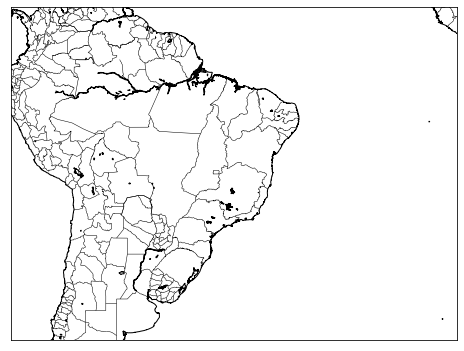

In [ ]:
# Função Basemap, plotar a projeção, o recorte das latitude e longitude e definir a resolução da imagem.
m = Basemap(projection='mill',llcrnrlat=lat1,urcrnrlat=lat2,\
            llcrnrlon=lon1,urcrnrlon=lon2,resolution='i')

# Função Matplotlib para definir o tamanho da figura.
plt.figure(figsize=(8,10))

#Inserindo os lat e lon a figura criada pelo Basemap e vinculando às variavéis  x e y
x, y = m(lons, lats)

#Função do Basemap para iserir ao mapa continentes, países e estados.
m.drawcoastlines()
m.drawcountries()
m.drawstates()

#Função do Basemap para realizar a interpolação e criação de polígonos
contourf = m.contourf(x, y, np.squeeze(data),cmap='GnBu')

print(contourf)
m.colorbar(contourf, location='right', pad="10%")

#Inserir titulo a imagem 
plt.title("Precipitação — 17-Fev-2021 às 01:40 am")

#Convertendo para o formato Geojson
geojson = geojsoncontour.contourf_to_geojson(
    contourf=contourf,
    min_angle_deg=3.0,
    ndigits=3,
    stroke_width=2,
)

#Plotar imagem
plt.show()
print(geojson)

# Arquivo IDX